## CLASS Fasta

In [382]:
from matplotlib import pyplot as plt
import random
from Bio import SeqIO
nucleotides = ['A', 'C', 'G', 'T']
class Fasta():
    def __init__(self, fasta_path):
        self.fasta_path= fasta_path
    
    def parse(self):
        fasta_parsed = [record.seq.upper() for record in SeqIO.parse(self.fasta_path, "fasta")]
        return fasta_parsed
    def count(self ,symbol):
        total = 0
        with open (self.fasta_path, "r") as fasta:
            for line in fasta:
                if line.startswith(symbol):
                    total +=1
        return total
    
    def nucleotide_frequencies(self):
        nucleotide_counts = {nucleotide: 0 for nucleotide in nucleotides}
        sequences = self.parse()  # Reuse the parse method
        for seq in sequences:
            for nucleotide in seq:
                if nucleotide in nucleotide_counts:
                    nucleotide_counts[nucleotide] += 1
        total_nucleotides = sum(nucleotide_counts.values())
        nucleotide_freqs = {nucleotide: count / total_nucleotides for nucleotide, count in nucleotide_counts.items()}
        return nucleotide_freqs


        
    def __str__(self):
        return f"Fasta file at {self.fasta_path}"
    

### Define 

In [388]:
fasta_path = "test.fasta" ; print(f'the fasta file path: {fasta_path}')
dna = Fasta(fasta_path)
number_of_dna = dna.count(">");  print(f'the number of DNA: {number_of_dna}')
frequency_nucleotides = dna.nucleotide_frequencies() ; print(f'frequency of nucleotides: {frequency_nucleotides}')

the fasta file path: test.fasta
the number of DNA: 100
frequency of nucleotides: {'A': 0.25712309820193635, 'C': 0.24686491470723837, 'G': 0.2690640848317197, 'T': 0.22694790225910558}


### Parse it and generate a list of sequences

In [392]:
parsed_dna = dna.parse()
print("Fasta is parsed at : parsed_dna")
print(f'the first sequence of the parsed fasta: {parsed_dna[1]}')

Fasta is parsed at : parsed_dna
the first sequence of the parsed fasta: ATGCGTTATATTCGCCTGTGTATTATCTCCCTGTTAGCCGCCCTGCCGCTGGCGGTACACGCCAGCCCGCAGCCGCTTGAGCAAATTAAACAAAGCGAAAGCCAGCTGTCGGGCCGCGTAGGCATGATAGAAATGGATCTGGCCAGCGGCCGCACGCTGACCGCCTGGCGCGCCGATGAACGCTTTCCCATGATAAGCACCTTTAAAGTAGTGCTCTGCGGCGCAGTGCTGGCGCGGGTGGATGCCGGTGACGAACAGCTGGAGCGAAAGATCCACTATCGCCAGCAGGATCTGGTGGACTACTCGCCGGTCAGCGAAAAACACCTTGCCGACGGCATGACGGTCGGCGAACTCTGTGCCGCCGCCATTACCATGAGCGATAACAGCGCCGCCAATTTGCTGCTGGCCATCGTCGGCGGCCCCGCAGGATTGACTGCCTTTTTGCGCCAGATCGGCGACAACGTCACCCGCCTTGACCGCTGGGAAACGGAACTGAATGAGGCGCTTCCCGGCGACGCCCGCGACACCACTACCCCGGCCAGCATGGCCGCGACCCTGCGCAAGCTGCTGACCAGCCAGCGTCTGAGCGCCCGTTCGCAACGGCAGCTGCTGCAGTGGATGGTGGACGATCGGGTCGCCGGACCGTTGATCCGCTCCGTGCTGCCGGCGGGCTGGTTTATCGCCGATAAGACCGGAGCTGGCGAACGGGGTGCGCGCGGGATTGTCGCCCTGCTTGGCCCGAATAACAAAGCAGAGCGCATTGTAGTGATTTATCTGCGGGATACCCCGGCGAGCATGGCCGAGCGAAATCAGCAAATCGCCGGGATCGGCGCGGCGCTGATCGAGCACTGGCAACGCTAA


## generate random sequence function

In [394]:
def random_sequence_generator(parsed_dna):
            if not parsed_dna:  # Check if the list is empty
                return None, None  # Or raise an error
            index= random.randint(0, len(parsed_dna)-1)
            random_sequence=parsed_dna[index]
            return index , random_sequence
        
        

indice, random_seq = random_sequence_generator(parsed_dna)
print(f'the type of indice :{type(indice)} and the type of the random sequence generated : {type(random_seq)}')
print(f'the index of the random sequence is {indice}')
print(f' the random sequence generated is the follows:{random_seq}')



the type of indice :<class 'int'> and the type of the random sequence generated : <class 'Bio.Seq.Seq'>
the index of the random sequence is 9
 the random sequence generated is the follows:ATGAATGTTCAAAATTGTATGGTAAAAGCCGTTTCCGTTAGCATCATTTTATTTGCATCCCTTTCCCTTGCTGCGCAAAAGGTAAAGGAACCAACCGTTAGTAACGCAGACTGGTCAAAGCCGTACCGGCCCTTTAGAATTGCCGGCAATTTATATTACATCGGTACATATGATCTCGCTTGTTATCTTATTACTACTAAACAGGGTAATATCATTGTCAATACCGGGCTGGCGGCTTCTGCATTACAAATAAAAAATAATATCAAAGCGTTAGGCTTTAAGTTAACTGACACCAAAATACTCTTAACAACACAGGCCCATTATGACCATTTGGGTGCAATGGCTGAAATTAAGAAAATAACAGGCGCAAAGCTCATGGCAGATGAGGGCGATGCGACGGTAATGGCTGATGGAGGCAGTTCTGATTACGCCTTCGGCGGGCATGGCAGTATGTTTGAACCTATAATAGCAGACCGCCTGCTGCATGATAAGGATACCATTCAGTTAGGGGATACAAAATTGGTGATGTTGCATCATCCCGGTCACACGAAGGGTTCCTGCAGTTTTTTATTTGATACAAAAGATGAGCAACGATCTTACAGGATATTAATCGCCAACATGCCTACCATCGTTATTGAAAAAAAATTTAGTGAAGTAAGTAGTTATCCCGGCATTGCTAAAGACTATGCCTATACTTTACAGGCAATGAAAAATCTTTCTTTTGATATATGGGTTGCATCTCATGCCAGCCAGTTTAGTATGCATAGCAAACACAAGCCGGGCGATGGGTATAATCCCAAGTCTTTTATGGA

## generate k-mer function

In [405]:
    def generate_k_random( parsed_dna, k_mer, motif_per_sequence):
        if not parsed_dna:
            print("Input list is empty. No motifs generated.")
            return []
        motifs = []            
        for sequence in parsed_dna:
            length = len(sequence)
            if k_mer <= length:
                for _ in range(motif_per_sequence):
                    start_index = random.randint(0, length - k_mer)
                    motif = sequence[start_index:start_index + k_mer]
                    motifs.append(motif)
            else:
                print(f"Sequence length ({length}) is shorter than k-mer length ({k_mer}). Skipping.")
        return motifs
  

k_mers_motif = generate_k_random(parsed_dna, 20, 1)  
print(f'number ok k-mers: {len(k_mers_motif)} of length: {len(k_mers_motif[0])}')
print(f'the type of k_mers : {type(k_mers_motif)}')
print(f'the first 3 k_mers :{k_mers_motif[0:3]}')


number ok k-mers: 100 of length: 20
the type of k_mers : <class 'list'>
the first 3 k_mers :[Seq('CGAACATCATCGCCCGCATA'), Seq('GCCTGTGTATTATCTCCCTG'), Seq('ATGTATATCACAGAAGTAGA')]


## CLASS Matrix

In [406]:
import numpy as np
import seaborn as sns

class Matrix():
    def __init__(self, k_mers  ):
        self.k_mers = k_mers
        
    def PFM(self, random_seq_index):
        self.random_seq_index= random_seq_index
        k_mers = self.k_mers.copy() # Create a copy to avoid modifying the original list
        total_motifs = len(k_mers)
        k_mer_length = len(k_mers[0])
        k_mers.pop(random_seq_index)  # Remove the k-mer at the given index
        nucleotides = ['A', 'C', 'G', 'T']
        nucleotide_frequencies = [{"A": 0, "C": 0, "G": 0, "T": 0} for _ in range(k_mer_length)]
    
        for motif in k_mers:
            for i, nucleotide in enumerate(motif):
                nucleotide_frequencies[i][nucleotide] += 1
        for pos_freq in nucleotide_frequencies:
            for nucleotide in pos_freq:
                pos_freq[nucleotide] /= total_motifs

        matrix = np.zeros((4, k_mer_length))
        for j, freq in enumerate(nucleotide_frequencies):
            for i, nucleotide in enumerate(nucleotides):
                matrix[i, j] = freq[nucleotide]

        return matrix

    
    def PWM(self, random_seq_index):
        pfm = self.PFM(random_seq_index) 
        background_freq = 0.25
        pwm = np.log2((pfm + 1e-6 ) / background_freq)  # Adding a small constant to avoid log(0)
        return pwm


    def PlotMatrix(self, matrice):
        random_seq_index = self.random_seq_index
        matrix = self.PFM(random_seq_index)
        plt.figure(figsize=(20, 4))
        sns.heatmap(matrice, annot=True, cmap="viridis", xticklabels=range(1, matrix.shape[1]+1), yticklabels=nucleotides, cbar_kws={"label": "Frequency"})
        plt.title("Nucleotide Frequency at Each Position")
        plt.xlabel("Position in Motif")
        plt.ylabel("Nucleotide")
        plt.show()
    

        


### generate a PFM without the random sequence

the type of the PWM:<class 'numpy.ndarray'>
the position weight matrix is the following:
[[0.26 0.21 0.23 0.29 0.27 0.27 0.28 0.28 0.33 0.29 0.26 0.29 0.23 0.36
  0.28 0.24 0.29 0.25 0.21 0.18]
 [0.28 0.23 0.15 0.16 0.21 0.25 0.18 0.2  0.28 0.15 0.3  0.2  0.22 0.24
  0.23 0.23 0.27 0.29 0.24 0.32]
 [0.27 0.34 0.34 0.29 0.28 0.23 0.34 0.25 0.22 0.26 0.22 0.25 0.28 0.27
  0.25 0.25 0.24 0.21 0.3  0.26]
 [0.18 0.21 0.27 0.25 0.23 0.24 0.19 0.26 0.16 0.29 0.21 0.25 0.26 0.12
  0.23 0.27 0.19 0.24 0.24 0.23]]


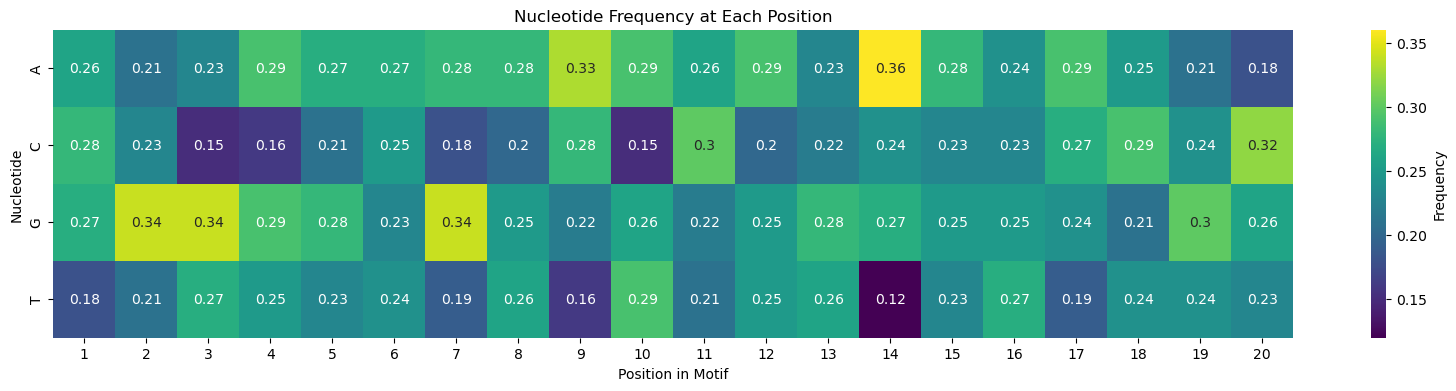

In [407]:
matrice = Matrix(k_mers_motif)
pfm  = matrice.PFM(indice)
print(f'the type of the PWM:{type(pfm)}')
print(f'the position weight matrix is the following:')
print(pfm)
matrice.PlotMatrix(pfm)

[[ 5.65890772e-02 -2.51531897e-01 -1.20287961e-01  2.14129780e-01
   1.11036656e-01  1.11036656e-01  1.63503885e-01  1.63503885e-01
   4.00542301e-01  2.14129780e-01  5.65890772e-02  2.14129780e-01
  -1.20287961e-01  5.26072819e-01  1.63503885e-01 -5.88876778e-02
   2.14129780e-01  5.77076862e-06 -2.51531897e-01 -4.73923173e-01]
 [ 1.63503885e-01 -1.20287961e-01 -7.36955976e-01 -6.43847173e-01
  -2.51531897e-01  5.77076862e-06 -4.73923173e-01 -3.21920881e-01
   1.63503885e-01 -7.36955976e-01  2.63039215e-01 -3.21920881e-01
  -1.84418013e-01 -5.88876778e-02 -1.20287961e-01 -1.20287961e-01
   1.11036656e-01  2.14129780e-01 -5.88876778e-02  3.56148319e-01]
 [ 1.11036656e-01  4.43610895e-01  4.43610895e-01  2.14129780e-01
   1.63503885e-01 -1.20287961e-01  4.43610895e-01  5.77076862e-06
  -1.84418013e-01  5.65890772e-02 -1.84418013e-01  5.77076862e-06
   1.63503885e-01  1.11036656e-01  5.77076862e-06  5.77076862e-06
  -5.88876778e-02 -2.51531897e-01  2.63039215e-01  5.65890772e-02]
 [-4.73

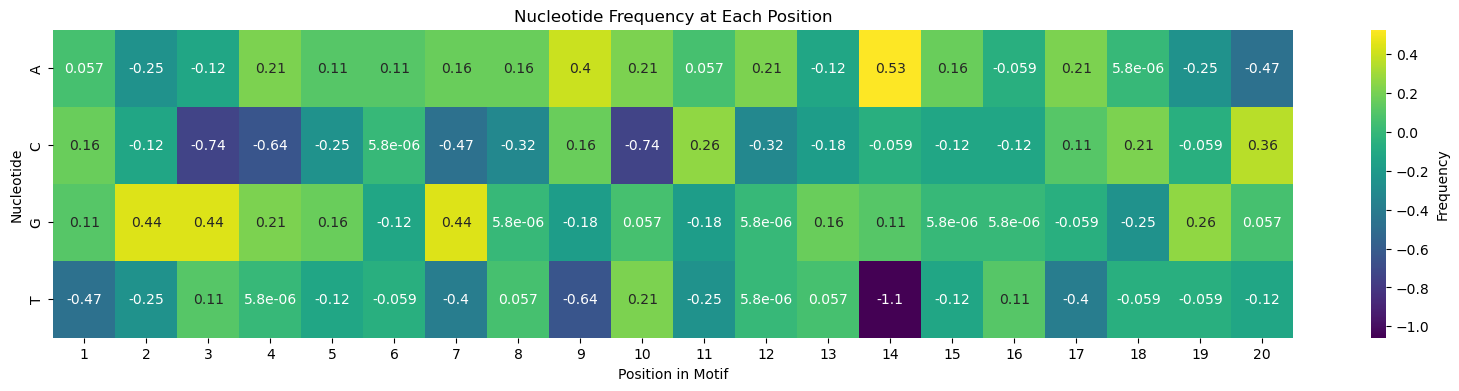

In [408]:
pwm = matrice.PWM(indice)
print(pwm)
matrice.PlotMatrix(pwm)

## CLASS Sequence:

In [409]:
class Sequence:
    def __init__(self, sequence):
        self.sequence = sequence
        
    def update_sequence(self, new_sequence):
        self.sequence = new_sequence
        
    def ScoreSequence(self, pwm):
        sequence = self.sequence
        kmer_length = pwm.shape[1] 
        L = len(sequence)
        probabilities = []
        nucleotide_to_row = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
        for i in range(L - kmer_length + 1):
            substring = sequence[i:i + kmer_length]
            prob_log = 0  # Log-probability score
            for j, nucleotide in enumerate(substring):
                if nucleotide in nucleotide_to_row:  
                    row_index = nucleotide_to_row[nucleotide]
                    prob_log += pwm[row_index, j]
            probabilities.append(prob_log)
        return probabilities
    

    def generate_kmer(self, pwm):
        sequence = self.sequence
        kmer_length = pwm.shape[1]  # Assuming pwm is a NumPy array
        L = len(sequence)
        
        # Calculate log probabilities for each k-mer
        log_probabilities = []
        nucleotide_to_row = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
        for i in range(L - kmer_length + 1):
            substring = sequence[i:i + kmer_length]
            prob_log = 0
            for j, nucleotide in enumerate(substring):
                if nucleotide in nucleotide_to_row:
                    row_index = nucleotide_to_row[nucleotide]
                    prob_log += pwm[row_index, j]
            log_probabilities.append(prob_log)
        
        # Convert log probabilities to probabilities
        # To avoid underflow, subtract the max log probability and then exponentiate
        max_log_prob = max(log_probabilities)
        probabilities = [np.exp(log_prob - max_log_prob) for log_prob in log_probabilities]
        
        # Normalize the probabilities so they sum to 1
        total_prob = sum(probabilities)
        probabilities = [prob / total_prob for prob in probabilities]
        
        # Sample a k-mer index from this distribution
        kmer_index = np.random.choice(range(L - kmer_length + 1), p=probabilities)
        
        # Return the sampled k-mer
        return sequence[kmer_index:kmer_index + kmer_length]

    

In [410]:
seq = Sequence(random_seq)
scores= seq.ScoreSequence(pwm)
new_motif = seq.generate_kmer(pwm)
print(new_motif)

AGGATATTAATCGCCAACAT


## Update the k-mers with the new one

In [411]:
def update_k_mers(k_mers, index_random_seq, new_k_mer):
    k_mers[index_random_seq] = new_k_mer
    
    

#### example of usage and verification

In [412]:
print(f'the k_mer of random sequence: {k_mers[indice]}')
print(k_mers)



the k_mer of random sequence: GCATCCCTTTCCCTTGCTGC
[Seq('ACATCATCGCCCGCATATCA'), Seq('CGCCGCCATTACCATGAGCG'), Seq('GAAGTGAAATATACGAGAAC'), Seq('ATACGCAGGTGCTTTATCGC'), Seq('AACGGTTTGGCGATCTGGTT'), Seq('TATTGTGATGCTCGCGAATA'), Seq('CGCTAGAATTGGTCTAGCTG'), Seq('TGGCATATGTGGTTTGACAT'), Seq('ATGAACGAAATAGACAGATC'), Seq('GCATCCCTTTCCCTTGCTGC'), Seq('GCCATAACCATGAGTGATAA'), Seq('TGAATGAAGCCATACCAAAC'), Seq('ACACCCATCCGTTACGGCAA'), Seq('ATACACAACTCGCTTTTAAA'), Seq('AGTCATAGTGAAATTGGGGA'), Seq('GCCGTGCTCAAGGATGGCAA'), Seq('TTTTATCCGCCTGTTCTTCC'), Seq('TTGAGGCGGCATACCGTATC'), Seq('CGGCCTTGAGCACCATAAGG'), Seq('ATAGATGACGATATTGAAGA'), Seq('CGATGAGACGTTTCGTCTGG'), Seq('AATGCTCAAACTGACAACTT'), Seq('TAATAATGTAACAGAAAAAG'), Seq('GAAAGACGCCCAGCAAATGA'), Seq('TCGACATTCAAGATACCTCA'), Seq('TCGCCCGACAGCTGGGAGAC'), Seq('AAGTAAAACTTTCACAGGTG'), Seq('TCAAAAAGAAGAAGAGCGAC'), Seq('TGATTTAGAAAAACGGTCCG'), Seq('CCTGCAAAAAAGCGTTACCT'), Seq('TGCCATGGCGACCTGTGCCC'), Seq('GCATCATTCGCACATGTAGG'), Seq('GTTGGACAACTACCA

In [413]:
update_k_mers(k_mers, indice, new_motif)

In [414]:
print(f'the k_mer of random sequence: {k_mers[indice]}')
print(k_mers)

the k_mer of random sequence: AGGATATTAATCGCCAACAT
[Seq('ACATCATCGCCCGCATATCA'), Seq('CGCCGCCATTACCATGAGCG'), Seq('GAAGTGAAATATACGAGAAC'), Seq('ATACGCAGGTGCTTTATCGC'), Seq('AACGGTTTGGCGATCTGGTT'), Seq('TATTGTGATGCTCGCGAATA'), Seq('CGCTAGAATTGGTCTAGCTG'), Seq('TGGCATATGTGGTTTGACAT'), Seq('ATGAACGAAATAGACAGATC'), Seq('AGGATATTAATCGCCAACAT'), Seq('GCCATAACCATGAGTGATAA'), Seq('TGAATGAAGCCATACCAAAC'), Seq('ACACCCATCCGTTACGGCAA'), Seq('ATACACAACTCGCTTTTAAA'), Seq('AGTCATAGTGAAATTGGGGA'), Seq('GCCGTGCTCAAGGATGGCAA'), Seq('TTTTATCCGCCTGTTCTTCC'), Seq('TTGAGGCGGCATACCGTATC'), Seq('CGGCCTTGAGCACCATAAGG'), Seq('ATAGATGACGATATTGAAGA'), Seq('CGATGAGACGTTTCGTCTGG'), Seq('AATGCTCAAACTGACAACTT'), Seq('TAATAATGTAACAGAAAAAG'), Seq('GAAAGACGCCCAGCAAATGA'), Seq('TCGACATTCAAGATACCTCA'), Seq('TCGCCCGACAGCTGGGAGAC'), Seq('AAGTAAAACTTTCACAGGTG'), Seq('TCAAAAAGAAGAAGAGCGAC'), Seq('TGATTTAGAAAAACGGTCCG'), Seq('CCTGCAAAAAAGCGTTACCT'), Seq('TGCCATGGCGACCTGTGCCC'), Seq('GCATCATTCGCACATGTAGG'), Seq('GTTGGACAACTACCA

# Loop

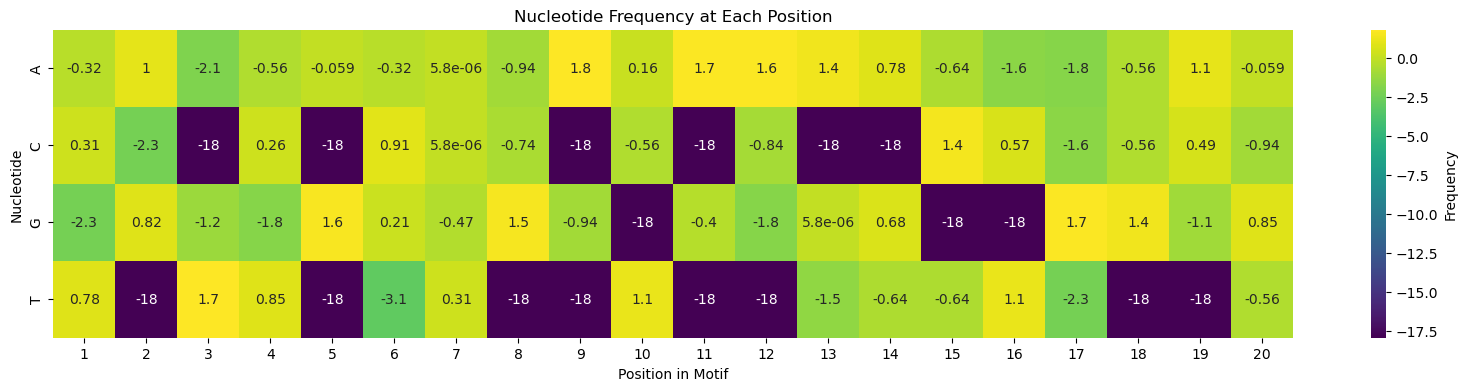

In [421]:
k_mers_motif = generate_k_random(parsed_dna, 20, 1) 

matrice = Matrix(k_mers_motif)
indice, random_seq = random_sequence_generator(parsed_dna)
seq = Sequence(random_seq)
pwm = matrice.PWM(indice)
scores= seq.ScoreSequence(pwm)
new_motif = seq.generate_kmer(pwm)
update_k_mers(k_mers_motif, indice, new_motif)
for i in range(11000):
    matrice = Matrix(k_mers_motif)
    indice, random_seq = random_sequence_generator(parsed_dna)
    seq = Sequence(random_seq)
    pwm = matrice.PWM(indice)
    scores= seq.ScoreSequence(pwm)
    new_motif = seq.generate_kmer(pwm)
    update_k_mers(k_mers_motif, indice, new_motif)

matrice.PlotMatrix(pwm)


    